# **Project Overview**
**Judul Proyek:** Indonesian Literacy Index by Region

**Latar Belakang:** Pemerataan teknologi digital di Indonesia hanya bisa tercapai jika diiringi dengan pemerataan literasi, terutama literasi digital. Tingkat literasi yang merata akan mendorong kualitas pembangunan SDM, sekaligus akan berdampak juga dengan kemampuan digital masyarakat. Data ini penting untuk strategi penetrasi pasar, program sosial, dan analisis literasi dapat mendukung inisiatif transformasi digital nasional.

**Tujuan:**

1.   Menganalisis kondisi Indeks Pembangunan Literasi Masyarakat (IPLM) di berbagai daerah di Indonesia.

2. Mengidentifikasi disparitas antarwilayah dalam akses dan kegiatan literasi.

3. Memberikan pengetahuan dasar yang dapat digunakan untuk mendorong program pemerataan literasi dan pembangunan SDM.

4. Menyediakan rekomendasi yang bermanfaat ke depannya bagi pemerintah, Samsung Hactive, dan IBM Indonesia dalam mendorong transformasi literasi digital yang inklusif.




# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import IBM Granite

In [3]:
from google.colab import userdata
import os

api_token = userdata.get('api_token')
os.environ['REPLICATE_API_TOKEN']=api_token

In [4]:
!pip install langchain_community
!pip install replicate

In [5]:
from langchain_community.llms import Replicate

# Ambil granite dari replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

In [6]:
# Cobain LLM nya cuy, cihuuyy
output = llm.invoke("Messi vs Antony")

print(output)

Lionel Messi and Antony are both renowned footballers, but they play different roles and have distinct styles. Here's a comparison:

1. **Lionel Messi**:
   - **Position**: Forward, primarily a left winger or second striker.
   - **Nationality**: Argentine.
   - **Club**: Paris Saint-Germain (as of 2021), previously Barcelona.
   - **Style**: Known for his exceptional dribbling, precise passing, and clinical finishing. He's also a prolific goalscorer and creator. Messi's vision and ability to find space in crowded areas make him a threat in any game.
   - **Achievements**: Seven Ballon d'Or awards, record for most goals in a calendar year (with 91 in 2012), record for most goals scored in a single La Liga season (45 in 2012), and a record six FIFA World Player of the Year awards. He's also the all-time leading goalscorer for both Argentina and Barcelona.

2. **Antony**:
   - **Position**: Winger, primarily plays on the left side.
   - **Nationality**: Brazilian.
   - **Club**: Manchest

# **Informasi Dataset**


Penjelasan untuk setiap kolom dalam dataset:

*   **No.**: Nomor urut data.
*   **Prov**: Nama Provinsi.
*   **Kodprov**: Kode Provinsi.
*   **Kabkot (Kabkot)**: Nama Kabupaten/Kota.
*   **Kodkabkot**: Kode Kabupaten/Kota.
*   **Lat**: Latitude (Lintang) lokasi.
*   **Long**: Longitude (Bujur) lokasi.
*   **UPLM1**: Skor untuk indikator UPLM 1 (Pemerataan layanan perpustakaan).
*   **UPLM2**: Skor untuk indikator UPLM 2 (Perpustakaan berstandar nasional (SNP)).
*   **UPLM3**: Skor untuk indikator UPLM 3 (Ketercukupan koleksi).
*   **UPLM4**: Skor untuk indikator UPLM 4 (Ketercukupan tenaga perpustakaan).
*   **UPLM5**: Skor untuk indikator UPLM 5 (Tingkat kunjungan masyarakat/hari).
*   **UPLM6**: Skor untuk indikator UPLM 6 (Jumlah anggota perpustakaan).
*   **UPLM7**: Skor untuk indikator UPLM 7 (Keterlibatan masyarakat dalam kegiatan sosialisasi).
*   **SKOR IPLM**: Skor Indeks Pembangunan Literasi Masyarakat secara keseluruhan.
*   **KATEGORI IPLM**: Kategori Indeks Pembangunan Literasi Masyarakat (misalnya: Rendah, Sedang, Tinggi).

In [7]:
df = pd.read_csv("/content/Indeks Pembangunan Literasi Masyarakat 2023.csv")

In [8]:
df.head()

,No.,Prov,Kodprov,Kabkot (Kabkot),Kodkabkot,Lat,Long,UPLM1,UPLM2,UPLM3,UPLM4,UPLM5,UPLM6,UPLM7,SKOR IPLM,KATEGORI IPLM
0,1,Aceh,11,Kab. Aceh Barat,11.05,4.46501,96.15141,0.271669,0.411685,0.529927,0.258802,0.935792,1.0,1.0,62.969633,Sedang
1,2,Aceh,11,Kab. Aceh Tengah,11.04,4.48444,96.82959,0.249412,0.279767,1.000000,0.055238,0.337078,1.0,1.0,56.021345,Sedang
2,3,Aceh,11,Kab. Aceh Tenggara,11.02,3.33537,97.68840,0.143956,0.230320,1.000000,0.012921,1.000000,1.0,1.0,62.674252,Sedang
3,4,Aceh,11,Kab. Aceh Barat Daya,11.12,3.81613,97.00436,0.365385,0.630126,1.000000,0.056435,1.000000,1.0,1.0,72.170648,Sedang
4,5,Aceh,11,Kab. Aceh Besar,11.06,5.46373,95.47604,0.203645,0.631573,1.000000,0.148737,1.000000,1.0,1.0,71.199351,Sedang


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No.              549 non-null    int64  
 1   Prov             549 non-null    object 
 2   Kodprov          549 non-null    int64  
 3   Kabkot (Kabkot)  549 non-null    object 
 4   Kodkabkot        549 non-null    float64
 5   Lat              549 non-null    float64
 6   Long             549 non-null    float64
 7   UPLM1            549 non-null    float64
 8   UPLM2            549 non-null    float64
 9   UPLM3            549 non-null    float64
 10  UPLM4            549 non-null    float64
 11  UPLM5            549 non-null    float64
 12  UPLM6            549 non-null    float64
 13  UPLM7            549 non-null    float64
 14  SKOR IPLM        549 non-null    float64
 15  KATEGORI IPLM    549 non-null    object 
dtypes: float64(11), int64(2), object(3)
memory usage: 68.8+ KB


# Rumusan Masalah

1.  Bagaimana korelasi antara setiap sub-indeks UPLM (Akses, Koleksi, Tenaga Pengelola, Sarana/Prasarana, Pemanfaatan, Kegemaran Membaca, dan Literasi Digital) dengan SKOR IPLM secara keseluruhan?
2.  Bagaimana perbedaan rata-rata skor setiap sub-indeks UPLM antara provinsi atau daerah dengan SKOR IPLM rata-rata tertinggi dan terendah?
3.  Sub-indeks UPLM manakah yang memiliki skor rata-rata terendah pada kategori IPLM 'Rendah' dan 'Sangat Rendah'?
4.  Bagaimana pola distribusi skor sub-indeks UPLM bervariasi di seluruh kategori IPLM yang berbeda?

# **EDA**

In [31]:
print("Statistik Deskriptif untuk Kolom Numerik:")
display(df.describe())

print("\nJumlah Nilai Unik per Provinsi:")
print(df['Prov'].nunique())
print("\nJumlah Nilai Unik per Kabupaten/Kota:")
print(df['Kabkot (Kabkot)'].nunique())

print("\nDistribusi Kategori IPLM:")
display(df['KATEGORI IPLM'].value_counts())

numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

Statistik Deskriptif untuk Kolom Numerik:


,No.,Kodprov,Kodkabkot,Lat,Long,UPLM1,UPLM2,UPLM3,UPLM4,UPLM5,UPLM6,UPLM7,SKOR IPLM
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,275.000000,45.433515,45.631056,-3.168210,113.132306,0.458909,0.338083,0.467324,0.183292,0.837518,0.926945,0.963952,59.657467
std,158.626921,26.602193,26.567677,3.850362,11.965328,0.232498,0.262899,0.376218,0.289891,0.290615,0.203598,0.156527,14.328458
min,1.000000,0.000000,0.000000,-9.909420,0.000000,0.006579,0.000000,0.000000,0.001035,0.000000,0.028376,0.019335,14.831938
25%,138.000000,18.000000,18.040000,-6.844390,104.614750,0.291341,0.139406,0.122593,0.029926,0.777710,1.000000,1.000000,50.981790
50%,275.000000,35.000000,35.730000,-3.326590,111.709520,0.432348,0.270273,0.345718,0.054466,1.000000,1.000000,1.000000,59.428252
75%,412.000000,72.000000,72.000000,-0.067250,120.504640,0.605317,0.447730,0.944334,0.155588,1.000000,1.000000,1.000000,68.561361
max,549.000000,92.000000,92.710000,5.922920,140.757150,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.483341



Jumlah Nilai Unik per Provinsi:
38

Jumlah Nilai Unik per Kabupaten/Kota:
516

Distribusi Kategori IPLM:


,count
KATEGORI IPLM,
Sedang,371
Rendah,112
Tinggi,39
Sangat Rendah,16
Sangat Tinggi,11


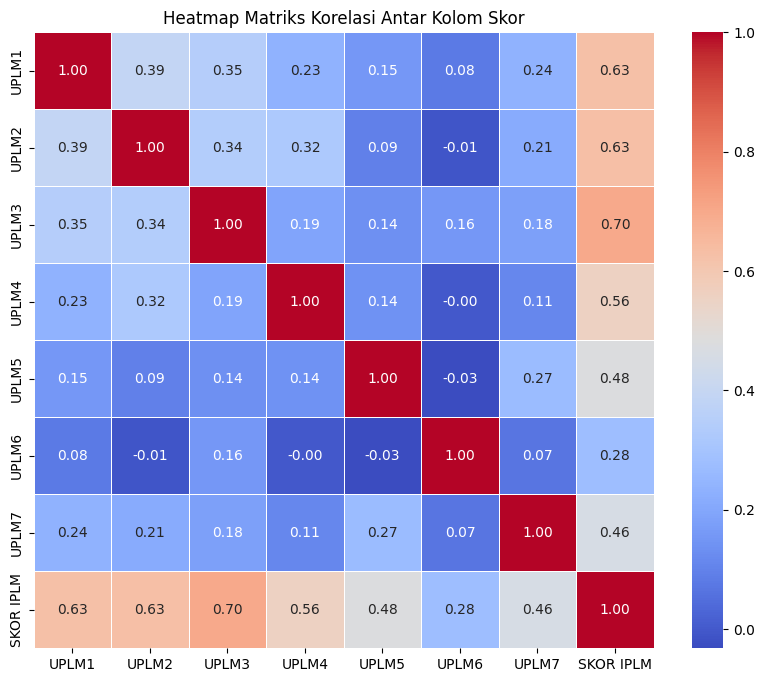

In [16]:
cols_to_exclude = ['No.', 'Kodprov', 'Kodkabkot', 'Lat', 'Long']
filtered_correlation_matrix = correlation_matrix.drop(cols_to_exclude, axis=0).drop(cols_to_exclude, axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Matriks Korelasi Antar Kolom Skor')
plt.show()

In [54]:
filtered_correlation_matrix_text = filtered_correlation_matrix.to_string()
prompt_correlation_summary = f"Ringkaslah dan interpretasikan matriks korelasi berikut dalam bahasa Indonesia. Jelaskan korelasi antara setiap sub-indeks UPLM dengan SKOR IPLM, dan identifikasi sub-indeks UPLM mana yang memiliki korelasi terkuat dengan SKOR IPLM:\n\n{filtered_correlation_matrix_text}"
summary_output = llm.invoke(prompt_correlation_summary)
print(summary_output)

Dari matriks korelasi di atas, dapat disimpulkan korelasi antara setiap sub-indeks UPLM dengan SKOR IPLM sebagai berikut:

1. **UPLM1 vs SKOR IPLM**: Korelasi 0.628782, yang menunjukkan korelasi positif moderat.
2. **UPLM2 vs SKOR IPLM**: Korelasi 0.630136, yang juga menunjukkan korelasi positif moderat.
3. **UPLM3 vs SKOR IPLM**: Korelasi 0.698921, korelasi positif yang lebih kuat, mengindikasi hubungan yang kuat antara UPLM3 dan SKOR IPLM.
4. **UPLM4 vs SKOR IPLM**: Korelasi 0.557030, korelasi positif moderat.
5. **UPLM5 vs SKOR IPLM**: Korelasi 0.476473, korelasi positif yang lebih kecil, moderat.
6. **UPLM6 vs SKOR IPLM**: Korelasi 0.277703, korelasi positif yang lebih kecil, lebih rendah.
7. **UPLM7 vs SKOR IPLM**: Korelasi 0.458101, korelasi positif moderat.

Sub-indeks UPLM yang memiliki korelasi paling kuat dengan SKOR IPLM adalah **UPLM3** dengan nilai korelasi 0.698921. Ini menunjukkan hubungan kuat positif antara UPLM3 dan SKOR IPLM, berarti bahwa variabel UPLM3 memiliki pen

## Identifikasi kesenjangan dan disparitas
Fokus pada identifikasi kesenjangan IPLM antar wilayah dan faktor-faktor yang berkontribusi terhadap disparitas tersebut berdasarkan kolom-kolom UPLM.


In [17]:
avg_iplm_prov = df.groupby('Prov')['SKOR IPLM'].mean().sort_values(ascending=False)
print("Rata-rata SKOR IPLM per Provinsi:")
display(avg_iplm_prov)

uplm_and_iplm_cols = [col for col in df.columns if 'UPLM' in col or col == 'SKOR IPLM']
avg_scores_by_category = df.groupby('KATEGORI IPLM')[uplm_and_iplm_cols].mean()

category_order = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

Rata-rata SKOR IPLM per Provinsi:


,SKOR IPLM
Prov,
Sulawesi Selatan,81.474722
DI Yogyakarta,78.589569
Kepulauan Bangka Belitung,77.495693
Kep Bangka Belitung,76.500036
DKI Jakarta,73.147569
Gorontalo,68.839561
Kep Riau,68.216123
Nasional,68.192472
Sumatera Barat,68.128382


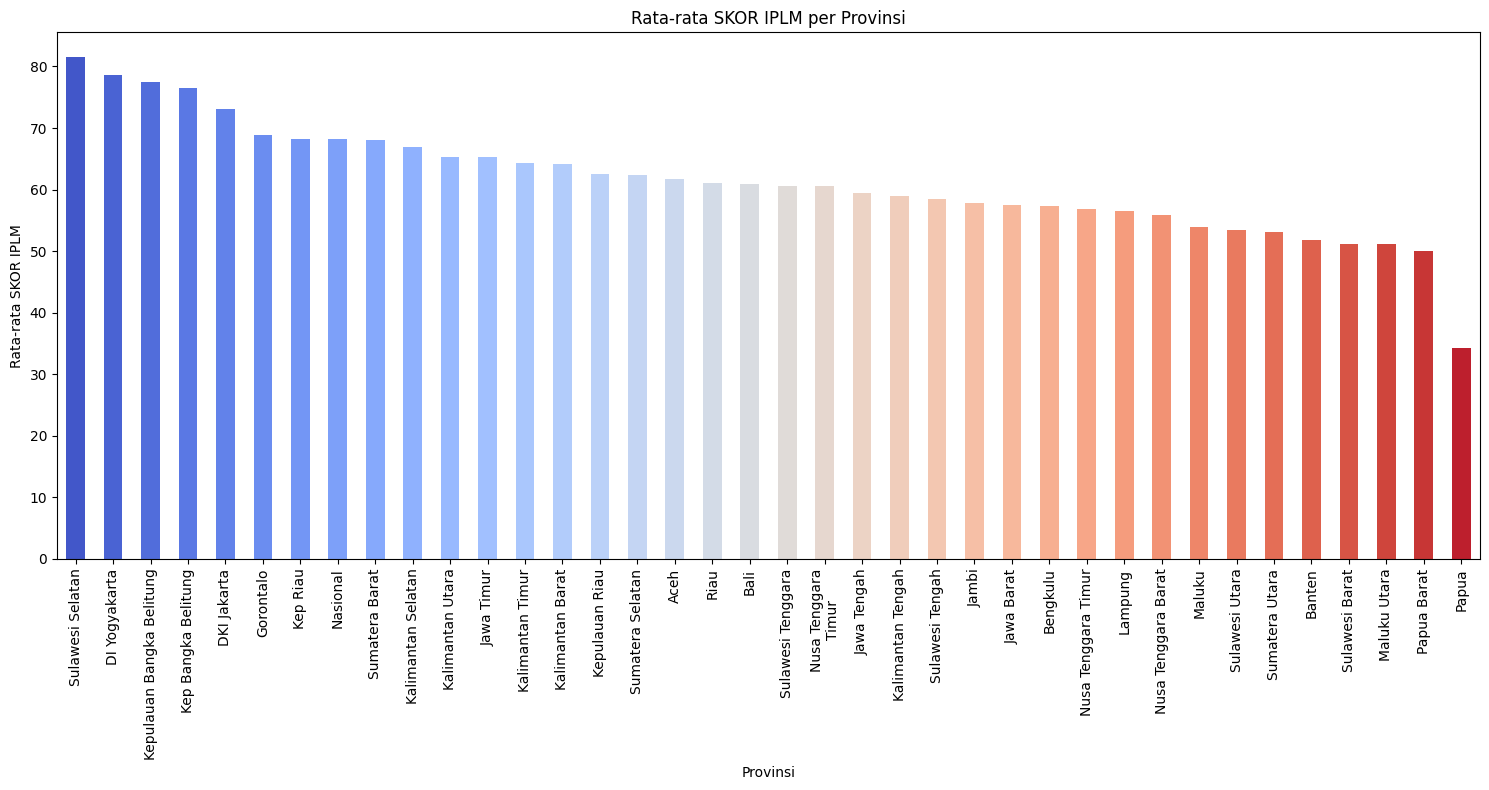

In [68]:
plt.figure(figsize=(15, 8))
avg_iplm_prov.plot(kind='bar', color=sns.color_palette('coolwarm', len(avg_iplm_prov)))
plt.title('Rata-rata SKOR IPLM per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Rata-rata SKOR IPLM')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [58]:
avg_iplm_prov_text = avg_iplm_prov.to_string()
prompt_avg_iplm = f"Ringkaslah data rata-rata Indeks Pembangunan Literasi Masyarakat (IPLM) per Provinsi berikut dalam bahasa Indonesia, sebutkan provinsi dengan skor tertinggi dan terendah:\n\n{avg_iplm_prov_text}"
summary_output = llm.invoke(prompt_avg_iplm)
print(summary_output)

Berikut adalah data rata-rata IPLM per provinsi tersebut, rangkum dan terurutkan dari tinggi ke rendah:

1. Sulawesi Selatan: 81.474722
2. DI Yogyakarta: 78.589569
3. Kepulauan Bangka Belitung: 77.495693
4. Kep Riau: 68.216123
5. DKI Jakarta: 73.147569
6. Gorontalo: 68.839561
7. Sumatera Barat: 68.128382
8. Kalimantan Selatan: 66.968902
9. Kalimantan Utara: 65.281595
10. Jawa Timur: 65.234776
11. Kalimantan Timur: 64.358976
12. Kalimantan Barat: 64.223571
13. Kepulauan Riau: 62.519349
14. Sumatera Selatan: 62.352229
15. Aceh: 61.716502
16. Riau: 61.118940
17. Bali: 60.893953
18. Sulawesi Tenggara: 60.608565
19. Nusa Tenggara Timur: 60.529411
20. Jawa Tengah: 59.444855
21. Kalimantan Tengah: 58.892063
22. Sulawesi Tengah: 58.496461
23. Jambi: 57.899027
24. Jawa Barat: 


In [19]:
lowest_iplm_prov = avg_iplm_prov.index[-1]
highest_iplm_prov = avg_iplm_prov.index[0]
print(f"\nProvinsi dengan SKOR IPLM rata-rata terendah: {lowest_iplm_prov} ({avg_iplm_prov.iloc[-1]:.2f})")
print(f"Provinsi dengan SKOR IPLM rata-rata tertinggi: {highest_iplm_prov} ({avg_iplm_prov.iloc[0]:.2f})")

lowest_iplm_category = avg_scores_by_category['SKOR IPLM'].idxmin()
highest_iplm_category = avg_scores_by_category['SKOR IPLM'].idxmax()
print(f"Kategori IPLM dengan SKOR IPLM rata-rata terendah: {lowest_iplm_category} ({avg_scores_by_category.loc[lowest_iplm_category, 'SKOR IPLM']:.2f})")
print(f"Kategori IPLM dengan SKOR IPLM rata-rata tertinggi: {highest_iplm_category} ({avg_scores_by_category.loc[highest_iplm_category, 'SKOR IPLM']:.2f})")


Provinsi dengan SKOR IPLM rata-rata terendah: Papua (34.22)
Provinsi dengan SKOR IPLM rata-rata tertinggi: Sulawesi Selatan (81.47)
Kategori IPLM dengan SKOR IPLM rata-rata terendah: Sangat Rendah (23.25)
Kategori IPLM dengan SKOR IPLM rata-rata tertinggi: Sangat Tinggi (93.05)


<Figure size 1400x800 with 0 Axes>

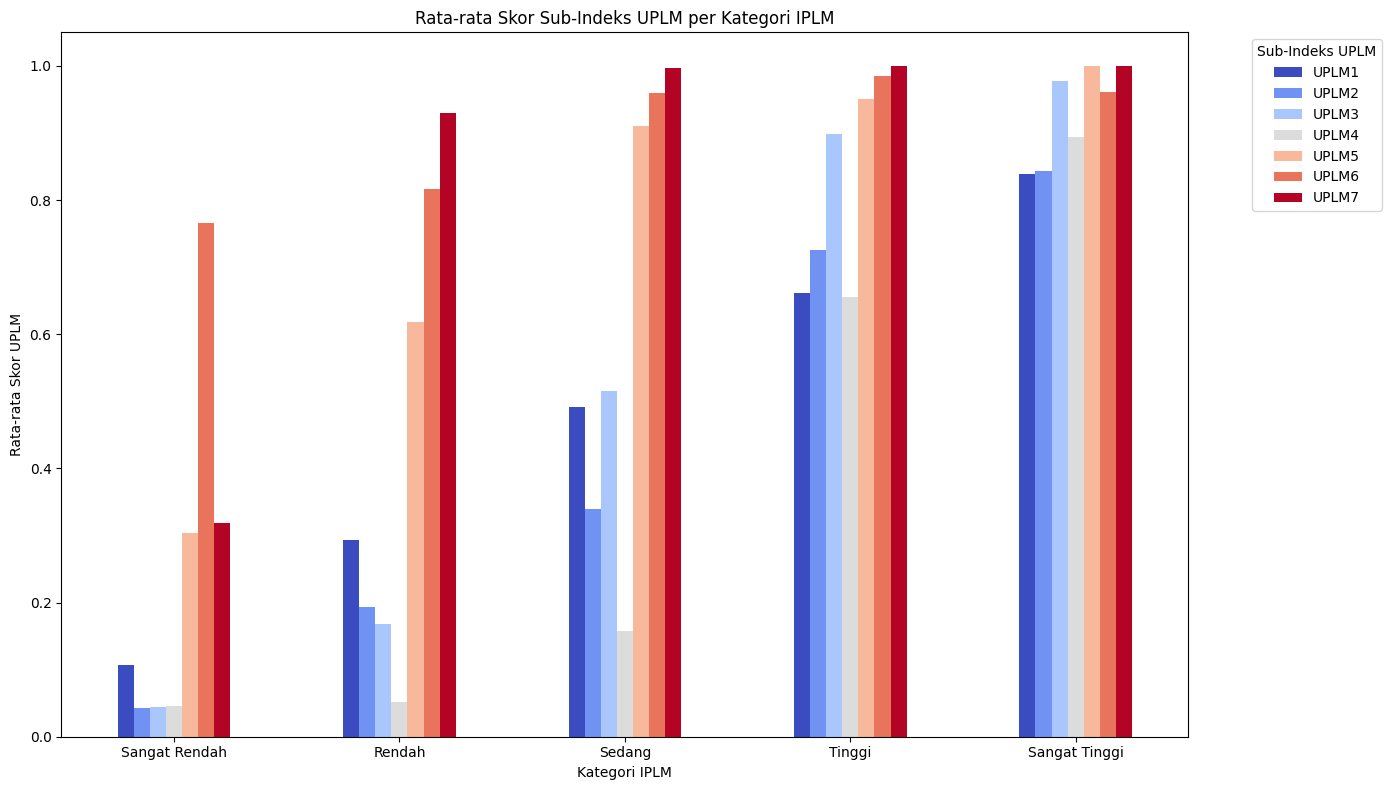

In [60]:
category_order = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
avg_scores_by_category_sorted = avg_scores_by_category.reindex(category_order)
uplm_cols_only = [col for col in avg_scores_by_category_sorted.columns if 'UPLM' in col]

plt.figure(figsize=(14, 8))
avg_scores_by_category_sorted[uplm_cols_only].plot(kind='bar', figsize=(14, 8), colormap='coolwarm')

plt.title('Rata-rata Skor Sub-Indeks UPLM per Kategori IPLM')
plt.xlabel('Kategori IPLM')
plt.ylabel('Rata-rata Skor UPLM')
plt.xticks(rotation=0)
plt.legend(title='Sub-Indeks UPLM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [67]:
avg_scores_by_category_text = avg_scores_by_category.to_string()
prompt_avg_scores_category = f"Ringkaslah data rata-rata skor sub-indeks UPLM dan SKOR IPLM per Kategori IPLM berikut dalam bahasa Indonesia, jelaskan tren skor di setiap kategori dan sub-indeks mana yang memiliki skor 'Sangat Rendah''Rendah' 'Sedang' 'Tinggi' 'Sangat Tinggi':\n\n{avg_scores_by_category_text}"
summary_output = llm.invoke(prompt_avg_scores_category)
print(summary_output)

Berikut adalah ringkasan data rata-rata skor sub-indeks UPLM dan SKOR IPLM per kategori IPLM dalam bahasa Indonesia:

**Sub-indeks UPLM:**

1. UPLM1: Skor rata-rata terendah di kategori Sangat Rendah, meningkat seiring dengan kategori IPLM menjadi Tinggi dan Sangat Tinggi.
2. UPLM2: Skor mulai meningkat dari kategori Rendah, mencapai puncak di kategori Sedang, dan terus meningkat di kategori Tinggi dan Sangat Tinggi.
3. UPLM3: Skor meningkat seiring dengan kategori IPLM, mulai dari Rendah, mencapai puncak di kategori Sedang, dan terus meningkat di kategori Tinggi dan Sangat Tinggi.
4. UPLM4: Skor mulai meningkat dari kategori Rendah, mencapai puncak di kategori Sedang, dan terus meningkat di kategori Tinggi dan Sangat Tinggi.
5. UPLM5: Skor meningkat signifikan dari kategori Rendah, mencapai puncak di kategori Tinggi, dan mencapai nilai maksimum di kategori Sangat Tinggi.
6. UPLM6: Skor meningkat signifikan dari kategori Rendah, mencapai puncak di kategori Tinggi, dan mencapai nilai ma

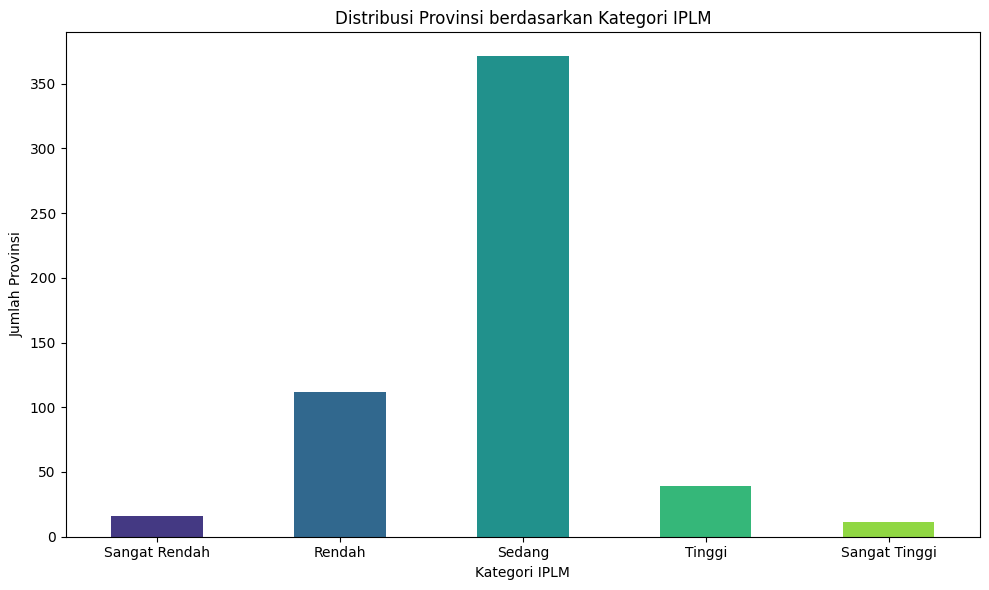

In [22]:
plt.figure(figsize=(10, 6))
df['KATEGORI IPLM'].value_counts().reindex(category_order).plot(kind='bar', color=sns.color_palette('viridis', len(category_order)))
plt.title('Distribusi Provinsi berdasarkan Kategori IPLM')
plt.xlabel('Kategori IPLM')
plt.ylabel('Jumlah Provinsi')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

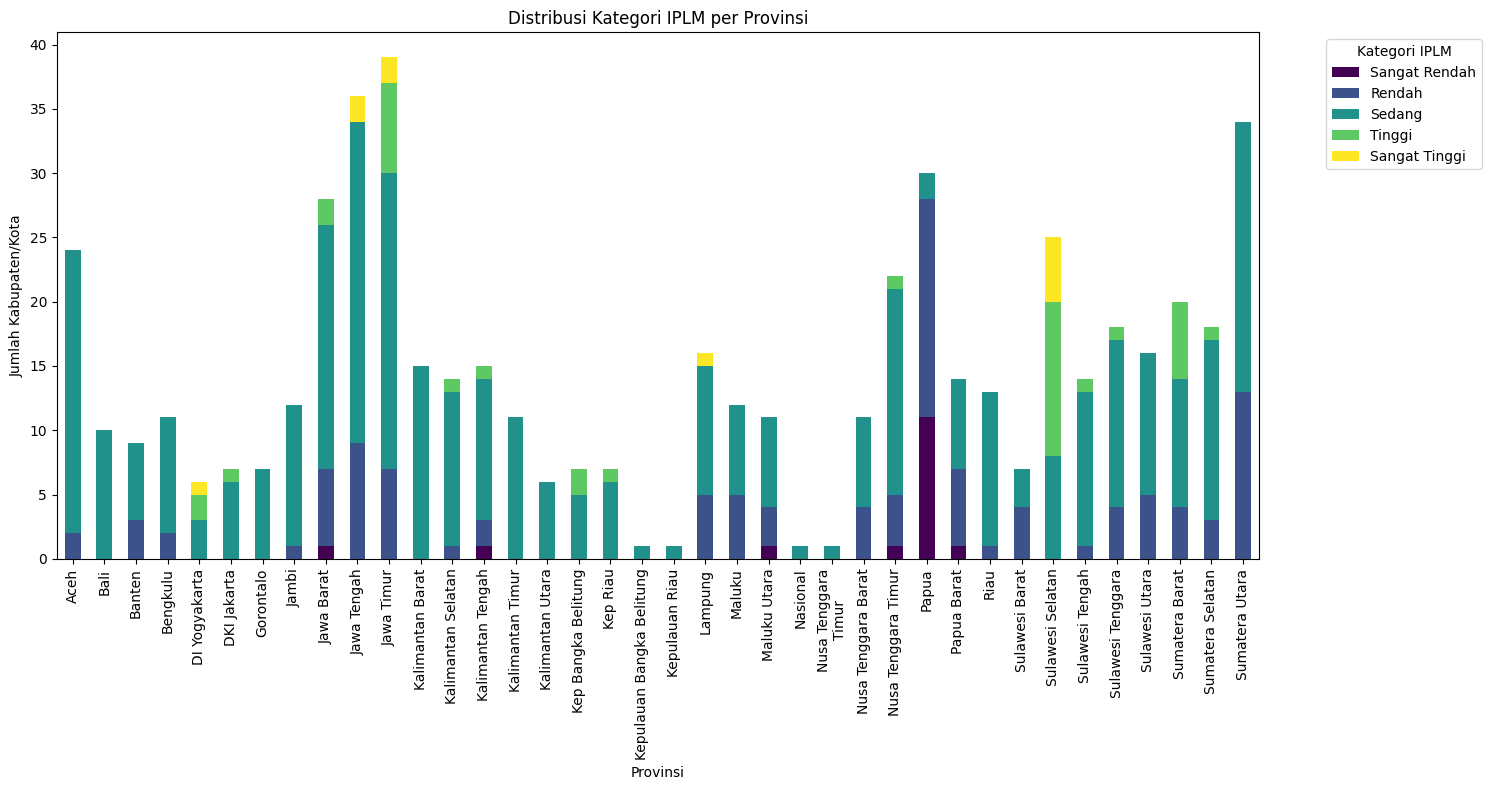

In [23]:
category_counts = df.groupby(['Prov', 'KATEGORI IPLM']).size().unstack(fill_value=0)
category_counts = category_counts.reindex(columns=category_order, fill_value=0)

plt.figure(figsize=(15, 8))
category_counts.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Distribusi Kategori IPLM per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kabupaten/Kota')
plt.xticks(rotation=90)
plt.legend(title='Kategori IPLM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
uplm_cols = [col for col in df.columns if 'UPLM' in col]
df_melted = df.melt(id_vars=['KATEGORI IPLM'], value_vars=uplm_cols, var_name='variable', value_name='value')

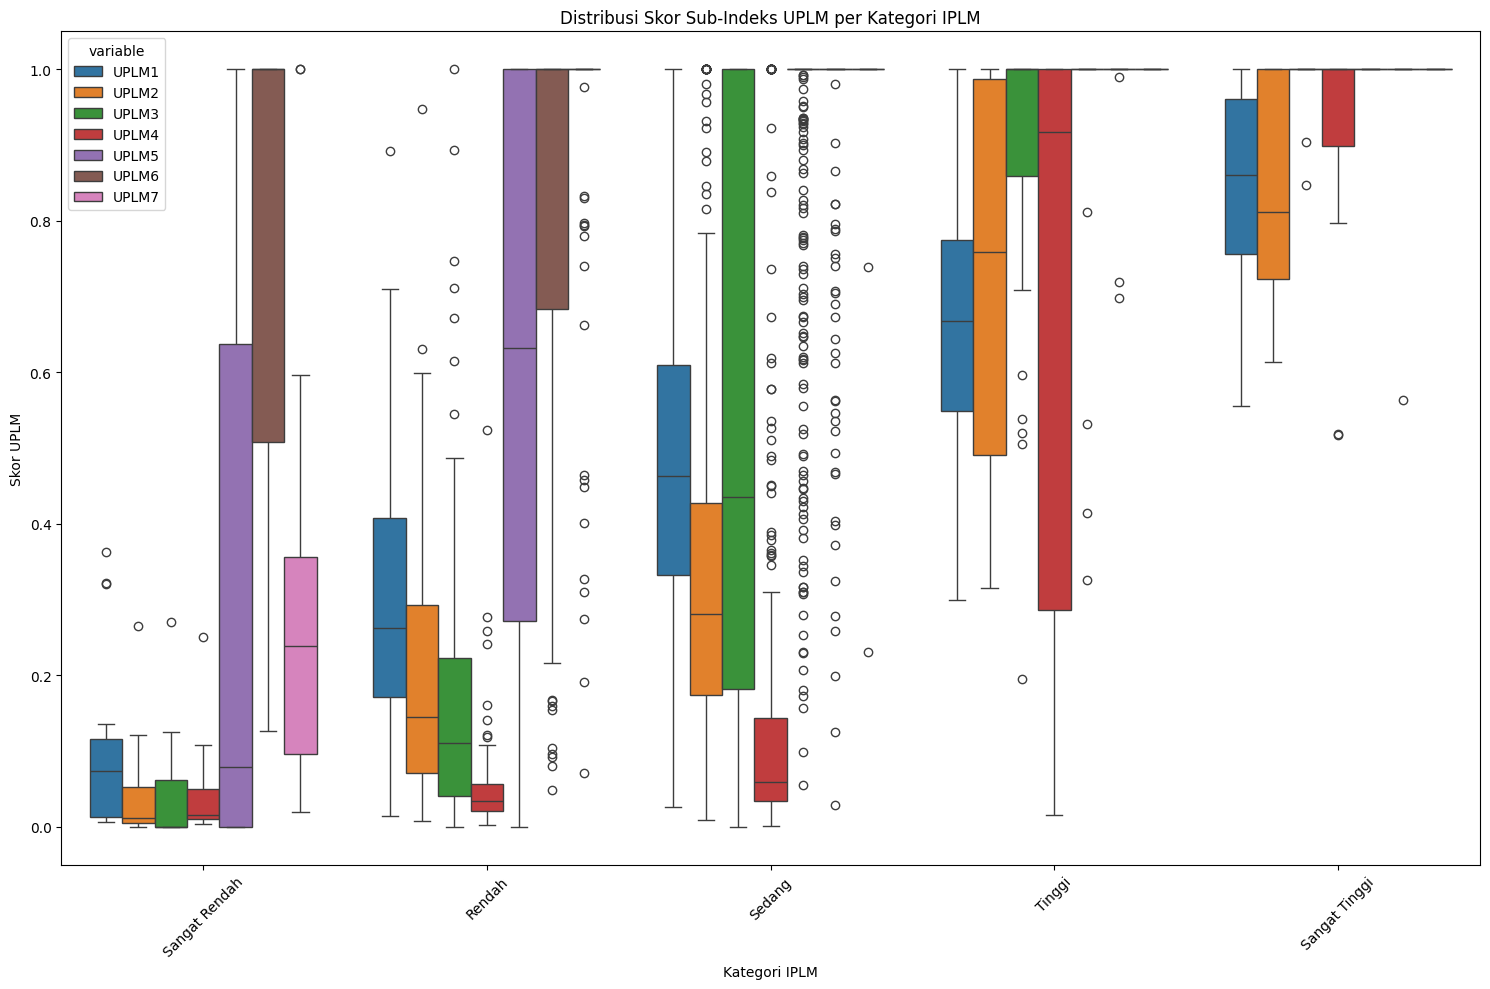

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='KATEGORI IPLM', y='value', hue='variable', data=df_melted, order=category_order)
plt.title('Distribusi Skor Sub-Indeks UPLM per Kategori IPLM')
plt.xlabel('Kategori IPLM')
plt.ylabel('Skor UPLM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Rangkuman untuk IBM Granite

### Temuan Kunci Analisis Data

*   Rata-rata SKOR IPLM bervariasi secara signifikan di seluruh provinsi, menunjukkan adanya disparitas dalam tingkat literasi provinsi.
*   Provinsi-provinsi terdistribusi di seluruh kategori IPLM yang ditetapkan ('Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'), dengan jumlah kabupaten/kota yang berbeda-beda di setiap kategori dalam satu provinsi.
*   Distribusi skor untuk setiap sub-indeks UPLM (mewakili komponen infrastruktur literasi yang berbeda) bervariasi di seluruh kategori IPLM, menunjukkan bahwa komponen UPLM tertentu mungkin berkontribusi lebih signifikan terhadap skor IPLM keseluruhan yang lebih tinggi atau lebih rendah.
*   Secara khusus, distribusi skor UPLM3 (Tenaga Pengelola) menunjukkan perbedaan antara provinsi dalam kategori IPLM 'Sangat Rendah' dan 'Rendah', yang berpotensi menyoroti peran tenaga pengelola di daerah dengan tingkat literasi yang lebih rendah.

### Wawasan atau Langkah Selanjutnya

*   Investigasi lebih lanjut terhadap sub-indeks UPLM spesifik yang menunjukkan variasi terbesar atau skor terendah di provinsi 'Sangat Rendah' dan 'Rendah' dapat mengidentifikasi area untuk program intervensi yang ditargetkan.
*   Menganalisis hubungan antara skor UPLM3 dan IPLM keseluruhan di daerah dengan literasi rendah dapat menginformasikan strategi untuk meningkatkan kualitas dan ketersediaan tenaga pengelola dalam inisiatif literasi.

In [75]:
# Menggabungkan temuan kunci dan wawasan untuk input model
analysis_findings = """
Temuan Kunci Analisis Data:
Skor tertinggi:
1. Sulawesi Selatan: 81.474722
2. DI Yogyakarta: 78.589569
3. Kepulauan Bangka Belitung: 77.495693
4. Kep Riau: 68.216123
5. Nasional: 68.192472

Skor terendah:
1. Papua Barat: 51.126277
2. Papua: 34.221531
3. Banten: 51.795596
4. Sulawesi Barat: 51.218069
5. Maluku Utara: 51.126277

1. UPLM1 vs SKOR IPLM: Korelasi 0.628782, yang menunjukkan korelasi positif moderat.
2. UPLM2 vs SKOR IPLM: Korelasi 0.630136, yang juga menunjukkan korelasi positif moderat.
3. UPLM3 vs SKOR IPLM: Korelasi 0.698921, korelasi positif yang lebih kuat, mengindikasi hubungan yang kuat antara UPLM3 dan SKOR IPLM.
4. UPLM4 vs SKOR IPLM: Korelasi 0.557030, korelasi positif moderat.
5. UPLM5 vs SKOR IPLM: Korelasi 0.476473, korelasi positif yang lebih kecil, moderat.
6. UPLM6 vs SKOR IPLM: Korelasi 0.277703, korelasi positif yang lebih kecil, lebih rendah.
7. UPLM7 vs SKOR IPLM: Korelasi 0.458101, korelasi positif moderat.

UPLM1: Skor rata-rata terendah di kategori Sangat Rendah, meningkat seiring dengan kategori IPLM menjadi Tinggi dan Sangat Tinggi.
UPLM2: Skor rata-rata tertinggi di kategori Rendah, meningkat seiring dengan kategori IPLM menjadi Tinggi dan Sangat Tinggi.
UPLM3: Skor rata-rata tertinggi di kategori Rendah, meningkat seiring dengan kategori IPLM menjadi Tinggi dan Sangat Tinggi.
UPLM4: Skor rata-rata tertinggi di kategori Rendah, meningkat seiring dengan kategori IPLM menjadi Tinggi dan Sangat Tinggi.
UPLM5: Skor rata-rata tertinggi di kategori Rendah, meningkat seiring dengan kategori IPLM menjadi Tinggi dan Sangat Tinggi.
UPLM6: Skor rata-rata tertinggi di kategori Rendah, meningkat seiring dengan kategori IPLM menjadi Tinggi dan Sangat Tinggi.
UPLM7: Skor rata-rata tertinggi di kategori Rendah, meningkat seiring dengan kategori IPLM menjadi Tinggi dan Sangat Tinggi.

No.: Nomor urut data.
Prov: Nama Provinsi.
Kodprov: Kode Provinsi.
Kabkot (Kabkot): Nama Kabupaten/Kota.
Kodkabkot: Kode Kabupaten/Kota.
Lat: Latitude (Lintang) lokasi.
Long: Longitude (Bujur) lokasi.
UPLM1: Skor untuk indikator UPLM 1 (Pemerataan layanan perpustakaan).
UPLM2: Skor untuk indikator UPLM 2 (Perpustakaan berstandar nasional (SNP)).
UPLM3: Skor untuk indikator UPLM 3 (Ketercukupan koleksi).
UPLM4: Skor untuk indikator UPLM 4 (Ketercukupan tenaga perpustakaan).
UPLM5: Skor untuk indikator UPLM 5 (Tingkat kunjungan masyarakat/hari).
UPLM6: Skor untuk indikator UPLM 6 (Jumlah anggota perpustakaan).
UPLM7: Skor untuk indikator UPLM 7 (Keterlibatan masyarakat dalam kegiatan sosialisasi).
SKOR IPLM: Skor Indeks Pembangunan Literasi Masyarakat secara keseluruhan.
KATEGORI IPLM: Kategori Indeks Pembangunan Literasi Masyarakat (misalnya: Rendah, Sedang, Tinggi).
"""



recommendation_prompt = f"Temukan conclusion dan rekomendasi untuk pihak pemerintah dan lembaga pendidikan digital seperti hactiv dalam mengurangi ketidakmerataan indeks pembangunan literasi masyarakat dari tahun 2023 ini, gunakan bahasa indonesia, sebutkan 3 rekomendasi terbaik:\n\n{analysis_findings}"
recommendation_output = llm.invoke(recommendation_prompt)
print(recommendation_output)

**Kesimpulan:**

Analisis data menunjukkan ketidakmerataan signifikan dalam indeks pembangunan literasi masyarakat (IPLM) di Indonesia. Provinsi seperti Sulawesi Selatan, DI Yogyakarta, Kepulauan Bangka Belitung, dan Kep. Riau memiliki skor IPLM yang tinggi, sedangkan Papua Barat, Papua, Banten, Sulawesi Barat, dan Maluku Utara memiliki skor IPLM yang rendah. Indikator-indikator seperti UPLM3 (Ketercukupan koleksi) dan UPLM1 (Pemerataan layanan perpustakaan) menunjukkan korelasi positif moderat dengan skor IPLM, sedangkan UPLM3 memiliki korelasi yang lebih kuat.

**Rekomendasi untuk Pemerintah dan Lembaga Pendidikan Digital:**

1. **Memperluas Infrastruktur Perpustakaan dan Tambahan Koleksi di Provinsi Rendah:** Pemerintah harus memperluas dan meningkatkan infrastruktur perpustakaan, khususnya di provinsi yang memiliki skor IPLM rendah seperti Papua Barat, Papua, Banten, Sulawesi Barat, dan Maluku Utara. Tambahan koleksi buku dan sumber daya digital relevan dapat membantu mengurangi ke